<a href="https://colab.research.google.com/github/matheus341/chance-faculdade/blob/main/regressaoTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.model_selection import train_test_split

In [2]:
# Carregando o dataset
data = pd.read_csv('dataset.csv')

In [3]:
# Separando variáveis numéricas e categóricas

# Normalizando as variáveis numércas
continuous_features = data[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA'] ].values / 100 

# Coletando a variável categórica
categorical_research_features = data[ [ 'Research' ] ].values 

In [4]:
# Contatenando as variáveis de entrada em X
X = np.concatenate( [ continuous_features , categorical_research_features ] , axis=1 )

# Variável resposta em Y
Y = data[ [ 'Chance of Admit' ] ].values

In [5]:
# Separando os dados em treino e teste
train_features, test_features, train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )

# Convertendo os dados de treino em tensores constantes e armazenando em X e Y
X_treino = tf.constant( train_features , dtype=tf.float32 )
Y_treino = tf.constant( train_labels , dtype=tf.float32 ) 
                  
# Mesma tarefa anterior com os dados de teste
X_teste = tf.constant( test_features , dtype=tf.float32 ) 
Y_teste = tf.constant( test_labels , dtype=tf.float32 ) 

In [6]:
# Função para calcular o erro quadrado médio
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

# Função para calcular a derivada do erro
def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )

In [7]:
# Função para calcular a hipótese (aproximação da função alvo)
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

# Inicializando os hiperparâmetros
num_epochs = 10
num_samples = X_treino.shape[0]
batch_size = 10
learning_rate = 0.001

num_features = X_treino.shape[1]


In [8]:

# Inicializando os pesos com valores aleartórios
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

In [9]:

# Coletando amostras dos dados para o treinamento e criando um iterador
dataset = tf.data.Dataset.from_tensor_slices(( X_treino , Y_treino )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [10]:

# Variáveis para o TensorBoard (substitua dmpm pelo seu usuário ao executar no Titan)
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = '/Desktop/IA_modelo/logregmodel/' + current_time + '/train'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)


In [11]:
print('\nIniciando o Treinamento:')

# Loop para o treinamento
for i in range( num_epochs ) :
    
    epoch_loss = list()

    for b in range( int(num_samples/batch_size) ):

        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output )
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 

    with train_summary_writer.as_default():
        tf.summary.scalar('loss', loss, step=i)
    
    print( 'A taxa de erro é igual a {}'.format( loss ) ) 


Iniciando o Treinamento:
A taxa de erro é igual a 6.889231204986572
A taxa de erro é igual a 3.3233370780944824
A taxa de erro é igual a 1.60693359375
A taxa de erro é igual a 0.7807536125183105
A taxa de erro é igual a 0.3838094174861908
A taxa de erro é igual a 0.19319258630275726
A taxa de erro é igual a 0.1017216295003891
A taxa de erro é igual a 0.05771241709589958
A taxa de erro é igual a 0.03671150282025337
A taxa de erro é igual a 0.026674414053559303


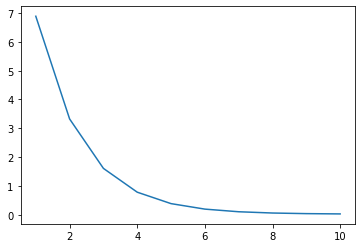


Mean Absolute Error (MAE) = 0.10181192308664322



Um estudante com as características abaixo:
[3.19 1.06 0.03 ... 0.03 0.08 1]

Teria o seguinte percentual de ser admitido na Universidade:
[65]




In [12]:
# Plot do resultado do treino
import matplotlib.pyplot as plt
plt.plot( epochs_plot , loss_plot ) 
plt.show()

# Gera previsões com os dados de teste
output = h( X_teste , weights , bias ) 
labels = Y_teste

# Calcula a acurácia
accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( '\nMean Absolute Error (MAE) = {}'.format( accuracy_op.result().numpy() ) )
print('\n')

print('\nUm estudante com as características abaixo:')
tf.print(X_teste[0,:])
print('\nTeria o seguinte percentual de ser admitido na Universidade:')
tf.print(Y_teste[0] * 100)
print('\n')

In [13]:
# Para inicializar o TensorBoard, execute esse comando no terminal: tensorboard --logdir=/tmp/dmpm/logregmodel
# (substitua dmpm pelo seu usuário ao executar no Titan)




